# Random Forest Assignment

## Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Loading Dataset

In [2]:
df = pd.read_csv("Fraud_check.csv")

## Data Understanding

In [3]:
df.head()

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,NO,Single,68833,50047,10,YES
1,YES,Divorced,33700,134075,18,YES
2,NO,Married,36925,160205,30,YES
3,YES,Single,50190,193264,15,YES
4,NO,Married,81002,27533,28,NO


In [4]:
df.shape

(600, 6)

In [5]:
df.isnull().sum()

Undergrad          0
Marital.Status     0
Taxable.Income     0
City.Population    0
Work.Experience    0
Urban              0
dtype: int64

In [6]:
df.describe()

,Taxable.Income,City.Population,Work.Experience
count,600.000000,600.000000,600.000000
mean,55208.375000,108747.368333,15.558333
std,26204.827597,49850.075134,8.842147
min,10003.000000,25779.000000,0.000000
25%,32871.500000,66966.750000,8.000000
50%,55074.500000,106493.500000,15.000000
75%,78611.750000,150114.250000,24.000000
max,99619.000000,199778.000000,30.000000


## Converting a categorical data into numerical using Label Encoding

In [7]:
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder

In [8]:
LabelEncoder = preprocessing.LabelEncoder()
df['Undergrad'] = LabelEncoder.fit_transform(df['Undergrad'])
df['Marital.Status'] = LabelEncoder.fit_transform(df['Marital.Status'])
df['Urban'] = LabelEncoder.fit_transform(df['Urban'])

In [9]:
df.head()

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,0,2,68833,50047,10,1
1,1,0,33700,134075,18,1
2,0,1,36925,160205,30,1
3,1,2,50190,193264,15,1
4,0,1,81002,27533,28,0


## Splitting a data into features and target

In [13]:
X = df.drop(labels='Taxable.Income',axis=1)
y = df['Taxable.Income']

In [14]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, random_state=42)

In [30]:
from sklearn.ensemble import RandomForestRegressor
RFReg = RandomForestRegressor(n_estimators = 100, random_state = 42)

In [31]:
RFReg.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [32]:
y_pred = RFReg.predict(X_test)

In [33]:
y_pred

array([54543.92, 43137.03, 73366.45, 58235.68, 46580.09, 76288.68,
       66312.15, 51570.02, 51634.69, 65017.71, 62918.11, 53691.57,
       66406.49, 49824.63, 49327.12, 52915.28, 50699.64, 51401.88,
       43221.33, 60270.21, 58067.93, 66999.72, 44129.89, 64302.59,
       46184.97, 57884.96, 52499.65, 50208.74, 45754.51, 58346.89,
       50592.52, 55425.22, 57619.78, 54204.71, 44428.06, 67332.22,
       59415.75, 50621.25, 64168.15, 59122.48, 39199.42, 60011.77,
       44627.32, 80741.13, 65716.53, 63599.06, 62382.44, 68698.12,
       50876.47, 63791.48, 65663.45, 69917.24, 50628.35, 60891.91,
       37965.93, 71480.9 , 70660.73, 49605.66, 48537.73, 65834.35,
       34207.25, 49400.25, 52426.27, 50134.55, 64235.02, 67129.51,
       56918.61, 51615.11, 60933.28, 48494.68, 49085.67, 63470.51,
       47949.34, 72751.92, 52267.31, 56811.58, 43288.68, 73277.26,
       68769.36, 56668.83, 47582.24, 62323.15, 53008.56, 54412.06,
       51709.54, 48536.38, 44234.66, 52223.64, 64383.08, 41711

In [34]:
from sklearn import metrics

In [35]:
r_square = metrics.r2_score(y_test, y_pred)

In [36]:
r_square

-0.1761631765915903

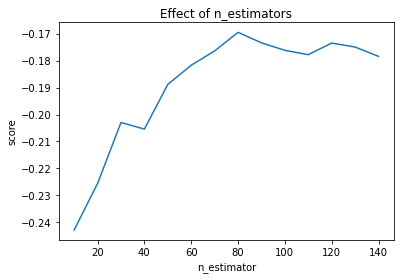

In [37]:
# Try different numbers of n_estimators - this will take a minute or so
estimators = np.arange(10, 150, 10)
scores = []
for n in estimators:
    RFReg.set_params(n_estimators=n)
    RFReg.fit(X_train, y_train)
    scores.append(RFReg.score(X_test, y_test))
plt.title("Effect of n_estimators")
plt.xlabel("n_estimator")
plt.ylabel("score")
plt.plot(estimators, scores)